In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [28]:
import warnings
from google.colab import files

# Ignore the warning
warnings.filterwarnings("ignore")

In [29]:
data = pd.read_csv('/content/drive/MyDrive/146/final PROJECT/df2.csv')
df2 = data.copy()

In [30]:
df2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,pCFOS_N,SYP_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,1.548348,2.235236,0.159821,1.239270,0.848767,0.226676,0.121521,0.131053,0.446073,1.337784
std,0.249015,0.251290,0.049314,0.346810,0.931802,0.041577,0.027004,1.293368,0.032542,0.466254,...,0.248132,0.254395,0.024150,0.173580,0.094311,0.028989,0.014276,0.023018,0.066432,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.853176,1.206098,0.101233,0.750664,0.577397,0.155869,0.067254,0.085419,0.258626,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.206389,...,1.375598,2.079338,0.142838,1.116262,0.793739,0.206395,0.110839,0.114373,0.398082,1.081423
50%,0.366540,0.566365,0.316703,2.297269,3.763306,0.231246,0.182270,3.329624,0.210681,1.356368,...,1.522693,2.242197,0.157549,1.236586,0.849858,0.224000,0.121626,0.128466,0.448459,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,1.713087,2.420226,0.173303,1.363079,0.916173,0.241655,0.131955,0.142427,0.490773,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,2.586216,2.877873,0.257616,1.897202,1.204598,0.358289,0.158748,0.256529,0.759588,2.129791


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = df2

# Split the data into features (X) and labels (y)
X = data.drop('class', axis=1)
y = data['class']

# Encode categorical columns
categorical_cols = ['Genotype', 'Treatment', 'Behavior']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = [f'{col}_{value}' for col, values in zip(categorical_cols, encoder.categories_) for value in values]
X.drop(categorical_cols, axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode class labels
class_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_encoded = class_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = class_encoder.transform(y_test.values.reshape(-1, 1))

# Create and train the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=200, random_state=42)
model.fit(X_train_scaled, y_train_encoded)

# Predict labels for the test set
y_pred_encoded = model.predict(X_test_scaled)

# Convert the encoded predictions to labels
def convert_encoded_to_labels(encoded):
    try:
        labels = class_encoder.inverse_transform(encoded)
        return labels
    except ValueError:
        return ['Unknown'] * len(encoded)

y_pred_labels = convert_encoded_to_labels(y_pred_encoded)

# Exclude samples with all zeros from predictions
non_zero_samples = np.any(y_pred_encoded, axis=1)
non_zero_indices = np.where(non_zero_samples)[0]
y_pred_labels_filtered = np.array(y_pred_labels)[non_zero_indices]
y_true_labels = y_test.values[non_zero_indices]

# Retrieve the unique classes from the original target variable
unique_classes = np.unique(y)

# Calculate F1 score, precision, recall, and confusion matrix
report = classification_report(y_true_labels, y_pred_labels_filtered, labels=unique_classes, target_names=unique_classes)
confusion = confusion_matrix(y_true_labels, y_pred_labels_filtered, labels=unique_classes)

print("Classification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)


Classification Report:
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        56
      c-CS-s       1.00      1.00      1.00        55
      c-SC-m       0.98      1.00      0.99        51
      c-SC-s       1.00      0.98      0.99        48
      t-CS-m       1.00      1.00      1.00        41
      t-CS-s       1.00      1.00      1.00        38
      t-SC-m       1.00      1.00      1.00        44
      t-SC-s       1.00      1.00      1.00        45

    accuracy                           1.00       378
   macro avg       1.00      1.00      1.00       378
weighted avg       1.00      1.00      1.00       378


Confusion Matrix:
[[56  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0]
 [ 0  0  1 47  0  0  0  0]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 38  0  0]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 45]]


In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = df2

# Split the dataset into X and y
X = df.drop('class', axis=1)  # Replace 'class' with the actual column name of your target variable
y = df['class']

# Encode categorical variables
categorical_cols = ['Genotype', 'Treatment', 'Behavior']
encoder = OneHotEncoder(sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = [f'{col}_{value}' for col, values in zip(categorical_cols, encoder.categories_) for value in values]
X.drop(categorical_cols, axis=1, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

# Encode class labels
class_encoder = OneHotEncoder(sparse=False)
y_encoded = pd.DataFrame(class_encoder.fit_transform(y.values.reshape(-1, 1)))
y_labels = class_encoder.categories_[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.35, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine the number of classes
num_classes = len(y_labels)

# Build the custom ANN model
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=11, batch_size=4, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)

# Print the evaluation result
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/11
176/176 [==============================] - 4s 9ms/step - loss: 2.0595 - accuracy: 0.1638 - val_loss: 2.0142 - val_accuracy: 0.1587
Epoch 2/11
176/176 [==============================] - 1s 7ms/step - loss: 1.9153 - accuracy: 0.2479 - val_loss: 1.8886 - val_accuracy: 0.2354
Epoch 3/11
176/176 [==============================] - 1s 7ms/step - loss: 1.7803 - accuracy: 0.2578 - val_loss: 1.7657 - val_accuracy: 0.2381
Epoch 4/11
176/176 [==============================] - 2s 11ms/step - loss: 1.6695 - accuracy: 0.2863 - val_loss: 1.6496 - val_accuracy: 0.2646
Epoch 5/11
176/176 [==============================] - 0s 3ms/step - loss: 1.5460 - accuracy: 0.3148 - val_loss: 1.5292 - val_accuracy: 0.3016
Epoch 6/11
176/176 [==============================] - 0s 3ms/step - loss: 1.3961 - accuracy: 0.3832 - val_loss: 1.3766 - val_accuracy: 0.4233
Epoch 7/11
176/176 [==============================] - 1s 3ms/step - loss: 1.2260 - accuracy: 0.5228 - val_loss: 1.2100 - val_accuracy: 0.4709
Epoch

In [46]:
# Predict labels for the test set
y_pred_encoded = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred_encoded, axis=1)
y_true_labels = np.argmax(y_test.values, axis=1)

# Calculate precision, recall, F1-score, and support
from sklearn.metrics import classification_report
report = classification_report(y_true_labels, y_pred_labels, target_names=y_labels)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)
print("Confusion Matrix:")
print(confusion)


12/12 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

      c-CS-m       1.00      0.70      0.82        56
      c-CS-s       0.86      0.98      0.92        55
      c-SC-m       0.88      1.00      0.94        51
      c-SC-s       1.00      0.83      0.91        48
      t-CS-m       1.00      1.00      1.00        41
      t-CS-s       0.84      0.97      0.90        38
      t-SC-m       0.96      1.00      0.98        44
      t-SC-s       0.81      0.84      0.83        45

    accuracy                           0.91       378
   macro avg       0.92      0.92      0.91       378
weighted avg       0.92      0.91      0.91       378

Confusion Matrix:
[[39  9  7  0  0  0  1  0]
 [ 0 54  0  0  0  0  0  1]
 [ 0  0 51  0  0  0  0  0]
 [ 0  0  0 40  0  0  1  7]
 [ 0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0 37  0  1]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  7  0 38]]


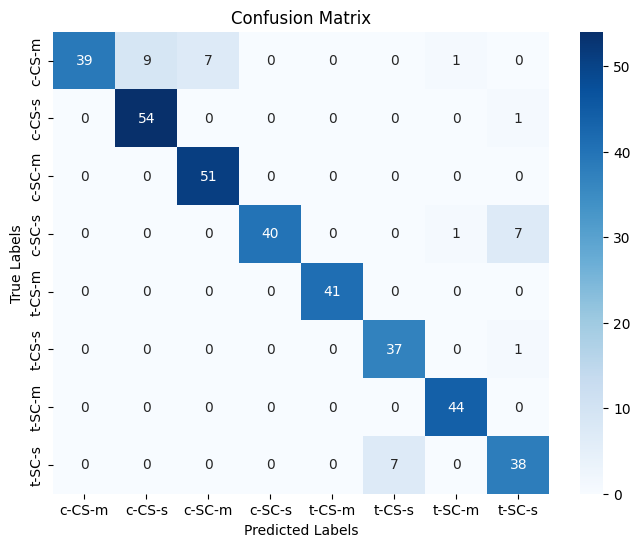

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=y_labels, yticklabels=y_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


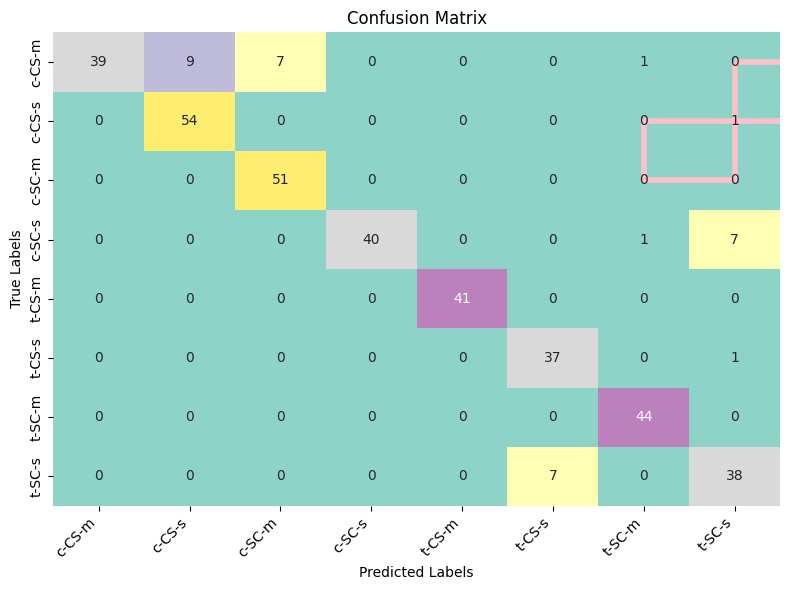

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Create a colormap with vibrant colors
cmap = sns.color_palette("Set3")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion, annot=True, cmap=cmap, fmt='d', xticklabels=y_labels, yticklabels=y_labels, cbar=False)

# Get the indices of misclassified entries
misclassified_indices = np.where(y_true_labels != y_pred_labels)[0]

# Highlight the misclassified cells
for index in misclassified_indices:
    ax.add_patch(plt.Rectangle((index + 0.5, len(y_labels) - index - 0.5), 1, 1, fill=False, edgecolor='pink', lw=4))

# Set axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust plot layout
plt.tight_layout()

# Show the plot
plt.show()
